In [ ]:
#利用多层感知器来识别MNIST

# 三板斧
"""
1. 权重和网络
    权重要有一个图。输入尺寸，hidder尺寸，输出尺寸
    网络要有图，hidder公式，y公式
2. 损失函数和梯度优化函数
    这里用交叉信息墒做损失函数。 正确书写公式。 会推导
    
3. epoch训练和测试
    epoch大小，传入参数。
    
"""

In [1]:
import tensorflow as tf
import numpy as np
import sklearn.preprocessing as prep
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
#if __name__ == '__main__':
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
sess = tf.InteractiveSession()

In [4]:
#设置weights
in_units = 784
h1_units = 300
W1 = tf.Variable(tf.truncated_normal([in_units,h1_units],stddev=0.1)) # input * W1 +b1 --> hidden
b1 = tf.Variable(tf.zeros([h1_units]))
W2 = tf.Variable(tf.zeros([h1_units,10]))
b2 = tf.Variable(tf.zeros([10]))


In [5]:
x = tf.placeholder(tf.float32, [None, in_units])
print("x",x)
keep_prob = tf.placeholder(tf.float32)

x Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


何为多层感知机?

input,hidden,output
![多层感知机](https://img-blog.csdn.net/20150128033221168?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdTAxMjE2MjYxMw==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

In [6]:
#搭建网络
hidden1 = tf.nn.relu(tf.matmul(x, W1) + b1)
hidden1_dropout = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_dropout, W2) + b2) #为了能够0，1范围描述概率，采用softmax函数。


In [7]:
#搭建评价标准--损失函数
y_ = tf.placeholder(tf.float32, [None, 10]) # 这个y_是真实值
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(0.3).minimize(cross_entropy)


In [9]:
tf.global_variables_initializer().run()
for i in range(3000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train_step.run({x:batch_xs, y_: batch_ys, keep_prob: 0.75})

In [11]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) #进一步的ｙ需要用line6的展开
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0}))

0.9799


In [28]:
#显示一下训练的权重，其实没看出什么高阶特性。
import matplotlib.pyplot as plt

<tf.Variable 'Variable:0' shape=(784, 300) dtype=float32_ref>
W1 m shape (784, 300)
W2 m [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
W2 m shape (300, 10)


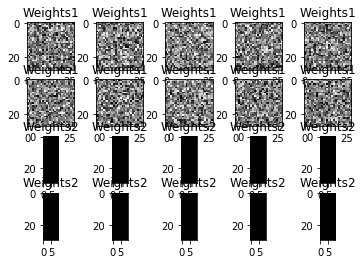

In [42]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(W1)
#print(sess.run(W1))
W1_m = sess.run(W1)
print("W1 m shape",W1_m.shape)
for i in range(10):
    W1_ms = W1_m[:,i].reshape((28,28))
    #print("i",i)
    plt.subplot(4, 5, i+1)
    plt.title("Weights1")
    plt.gray()
    plt.imshow(W1_ms)

W2_m = sess.run(W2)
print("W2 m",W2_m)
print("W2 m shape",W2_m.shape)

# W2的权重为什么都是0呢？不对
for j in range(10):
    W2_ms = W2_m[:,j].reshape((30,10))
    #print("i",i)
    plt.subplot(4, 5, j+11)
    plt.title("Weights2")
    plt.gray()
    plt.imshow(W2_ms)

